In [1]:
import pandas as pd
import time
# Load your dataset
data = pd.read_csv('processed_data.csv')
# Display the first few rows
print(data.head())
sample_size = 20000  # Specify the desired sample size
sampled_data = data.sample(n=sample_size, random_state=42)

   label                                            subject  \
0      1                  Generic Cialis, branded quality@    
1      0                             Typo in /debian/README   
2      1                                   authentic viagra   
3      1                               Nice talking with ya   
4      1  or trembling; stomach cramps; trouble in sleep...   

                          email_to  \
0        the00@speedy.uwaterloo.ca   
1  debian-mirrors@lists.debian.org   
2         <the00@plg.uwaterloo.ca>   
3         opt4@speedy.uwaterloo.ca   
4     ktwarwic@speedy.uwaterloo.ca   

                                          email_from  \
0                 "Tomas Jacobs" <RickyAmes@aol.com>   
1         Yan Morin <yan.morin@savoirfairelinux.com>   
2  "Sheila Crenshaw" <7stocknews@tractionmarketin...   
3       "Stormy Dempsey" <vqucsmdfgvsg@ruraltek.com>   
4         "Christi T. Jernigan" <dcube@totalink.net>   

                                             message  


In [2]:
# Display the first few rows
print(data.head())
sample_size = 20000  # Specify the desired sample size
sampled_data = data.sample(n=sample_size, random_state=42)

   label                                            subject  \
0      1                  Generic Cialis, branded quality@    
1      0                             Typo in /debian/README   
2      1                                   authentic viagra   
3      1                               Nice talking with ya   
4      1  or trembling; stomach cramps; trouble in sleep...   

                          email_to  \
0        the00@speedy.uwaterloo.ca   
1  debian-mirrors@lists.debian.org   
2         <the00@plg.uwaterloo.ca>   
3         opt4@speedy.uwaterloo.ca   
4     ktwarwic@speedy.uwaterloo.ca   

                                          email_from  \
0                 "Tomas Jacobs" <RickyAmes@aol.com>   
1         Yan Morin <yan.morin@savoirfairelinux.com>   
2  "Sheila Crenshaw" <7stocknews@tractionmarketin...   
3       "Stormy Dempsey" <vqucsmdfgvsg@ruraltek.com>   
4         "Christi T. Jernigan" <dcube@totalink.net>   

                                             message  


In [3]:
sampled_data['valid_email'] = sampled_data['message'].notnull()
cleaned_data = sampled_data[sampled_data['valid_email']]
cleaned_data

,label,subject,email_to,email_from,message,valid_email
20188,1,Re:,<catchall@speedy.uwaterloo.ca>,"""Odessa Mckinnon"" <best@09pia.com>","Content-Type: text/plain;\n\tcharset=""iso-8859...",True
60034,1,NaN,the00@flax9.uwaterloo.ca,"""Denny Smart"" <rmnezzxxh@cyberway.com.sg>",Rise up !\nThis is just amazing and I feel I n...,True
63951,0,Re: with module fglrx loaded hibernate crashes...,debian-laptop <debian-laptop@lists.debian.org>,Gerard Robin <g.robin3@free.fr>,"On Fri, Jun 22, 2007 at 09:13:35PM +0200, Flor...",True
61018,1,Re:,<mail@flax9.uwaterloo.ca>,"""Viktoria Holsey"" <landwardedsel@questarweb.com>","Content-Type: text/plain;\n\tcharset=""windows-...",True
51740,0,[perl #39426] [BUG] Can't build with cygwin.,"""OtherRecipients of perl Ticket #39426"": ;","""Paul Cochrane via RT"" <parrotbug-followup@par...",cygwin is currently building (as of r18821). ...,True
...,...,...,...,...,...,...
72252,1,RE:,the00@plg.uwaterloo.ca,Harder erections <craiyhan@excite.co.uk>,You will pleased to see the results.\n\nhttp:/...,True
7358,1,Avis Important et Personnel,email2236@speedy.uwaterloo.ca,Groupe Desjardins / AccesD <services.de.cartes...,Cher(e) membre \n Desjardins/ A...,True
9541,0,News Summary,ktwarwic@speedy.uwaterloo.ca,"""CBSNews.com Weekend HTML"" <cbsnews_weekend_ht...","April 15, 2007 Home | U.S. | World | Politics ...",True
74021,1,Products that can improve you life,<mail@flax9.uwaterloo.ca>,"""Wendy Bottorff"" <brooksm@brooks.nl>","Content-Type: text/plain;\n\tcharset=""windows-...",True


In [4]:
cleaned_data = cleaned_data.drop_duplicates(subset=['subject', 'message'], keep='first')

cleaned_data

,label,subject,email_to,email_from,message,valid_email
20188,1,Re:,<catchall@speedy.uwaterloo.ca>,"""Odessa Mckinnon"" <best@09pia.com>","Content-Type: text/plain;\n\tcharset=""iso-8859...",True
60034,1,NaN,the00@flax9.uwaterloo.ca,"""Denny Smart"" <rmnezzxxh@cyberway.com.sg>",Rise up !\nThis is just amazing and I feel I n...,True
63951,0,Re: with module fglrx loaded hibernate crashes...,debian-laptop <debian-laptop@lists.debian.org>,Gerard Robin <g.robin3@free.fr>,"On Fri, Jun 22, 2007 at 09:13:35PM +0200, Flor...",True
61018,1,Re:,<mail@flax9.uwaterloo.ca>,"""Viktoria Holsey"" <landwardedsel@questarweb.com>","Content-Type: text/plain;\n\tcharset=""windows-...",True
51740,0,[perl #39426] [BUG] Can't build with cygwin.,"""OtherRecipients of perl Ticket #39426"": ;","""Paul Cochrane via RT"" <parrotbug-followup@par...",cygwin is currently building (as of r18821). ...,True
...,...,...,...,...,...,...
53287,1,Check out the wonders of pound melting,almer@flax24.uwaterloo.ca,"""Edgar Keene"" <hitmartechindiafav@martechindia...",Content-Type: text/plain; charset=us-ascii\nCo...,True
72252,1,RE:,the00@plg.uwaterloo.ca,Harder erections <craiyhan@excite.co.uk>,You will pleased to see the results.\n\nhttp:/...,True
9541,0,News Summary,ktwarwic@speedy.uwaterloo.ca,"""CBSNews.com Weekend HTML"" <cbsnews_weekend_ht...","April 15, 2007 Home | U.S. | World | Politics ...",True
74021,1,Products that can improve you life,<mail@flax9.uwaterloo.ca>,"""Wendy Bottorff"" <brooksm@brooks.nl>","Content-Type: text/plain;\n\tcharset=""windows-...",True


In [5]:
import re  # Import the re module for regular expressions
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
def clean_text(text):
    # Check if the text is a string
    if isinstance(text, str):
        # Convert text to lowercase
        text = text.lower()
        # Remove leading and trailing white spaces
        text = text.strip()
        # Replace email addresses with 'MAILID'
        text = re.sub(r'\S+@\S+', 'MAILID', text)
        # Replace URLs with 'LINKS'
        text = re.sub(r'http\S+|https\S+', 'LINKS', text, flags=re.MULTILINE)
        # Replace currency symbols with 'MONEY'
        text = re.sub(r'\$\d+|\£\d+|\€\d+', 'MONEY', text)
        # Replace contact numbers with 'contact number'
        text = re.sub(r'\b\d{10}\b|\+\d{1,2}\s?\d{10}', 'contact number', text)
        # Replace non-alphanumeric characters with white space
        text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text)
    else:
        # Return an empty string for non-string values (like NaN)
        text = ''
    return text

def remove_stop_words(text):
    # Split text into words and filter out stop words
    words = text.split()
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]
    return ' '.join(words)

In [6]:

# Clean 'subject' and 'message' columns
cleaned_data['cleaned_subject'] = cleaned_data['subject'].apply(clean_text).apply(remove_stop_words)
cleaned_data['cleaned_message'] = cleaned_data['message'].apply(clean_text).apply(remove_stop_words)


<ipython-input-6-86427361e49d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['cleaned_subject'] = cleaned_data['subject'].apply(clean_text).apply(remove_stop_words)
<ipython-input-6-86427361e49d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['cleaned_message'] = cleaned_data['message'].apply(clean_text).apply(remove_stop_words)


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
cleaned_data['combined_text'] = cleaned_data['cleaned_subject'] + ' ' + cleaned_data['cleaned_message']


# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=50000)  # Limit features for memory management

# Fit and transform the combined text into TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_data['combined_text'])

# Create a DataFrame for the TF-IDF matrix
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Add labels to the DataFrame
tfidf_df['label'] = cleaned_data['label'].values  # Assuming 'label' column exists in cleaned_data

# Split features and labels
X = tfidf_df.drop('label', axis=1)  # Features (TF-IDF vectors)
y = tfidf_df['label']


<ipython-input-7-cb9ea85ff145>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['combined_text'] = cleaned_data['cleaned_subject'] + ' ' + cleaned_data['cleaned_message']


In [8]:
#data spliting
# Split the dataset into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Logistic Regression Training Time: 17.2065 seconds
Logistic Regression

 Accuracy: 0.9885321100917431
 Precision: 0.9892973476035365
 Recall: 0.9920671955202987
 F1 Score: 0.9906803355079217
 ROC AUC: 0.9874834118865433


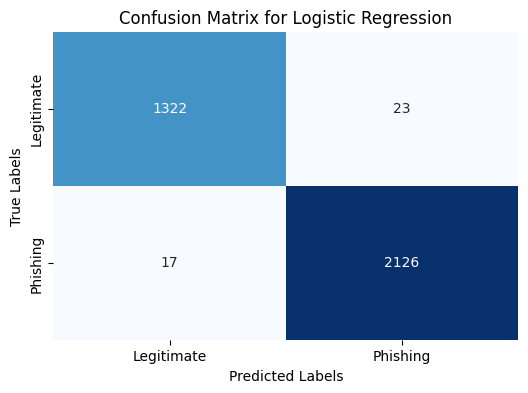

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and fit the model
start_time = time.time()
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
end_time = time.time()
lr_train_time = end_time - start_time
print(f"Logistic Regression Training Time: {lr_train_time:.4f} seconds")

# Make predictions
lr_predictions = lr_model.predict(X_test)

# Evaluate the model
print("Logistic Regression\n")
print(" Accuracy:", accuracy_score(y_test, lr_predictions))
print(" Precision:", precision_score(y_test, lr_predictions))
print(" Recall:", recall_score(y_test, lr_predictions))
print(" F1 Score:", f1_score(y_test, lr_predictions))
print(" ROC AUC:", roc_auc_score(y_test, lr_predictions))

# Confusion matrix
cm = confusion_matrix(y_test, lr_predictions)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Phishing"], yticklabels=["Legitimate", "Phishing"])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()



KNN

Accuracy: 0.6797591743119266
Precision: 0.6576521204671174
Recall: 0.9986000933271115
F1 Score: 0.7930331665740226
ROC AUC: 0.5851736526115111


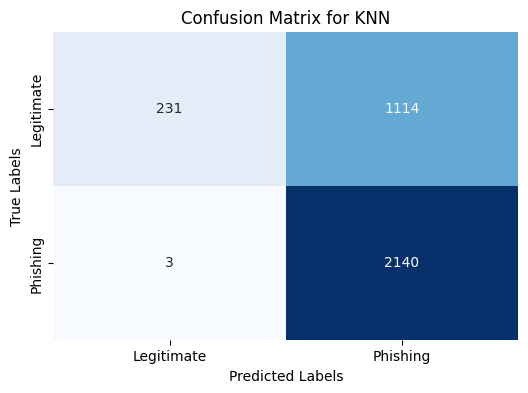

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
start_time = time.time()
# Fit the model with the scaled training data
knn_model.fit(X_train_scaled, y_train)
end_time = time.time()
knn_train_time = end_time - start_time

# Make predictions on the scaled test data
knn_predictions = knn_model.predict(X_test_scaled)

# Evaluate the model
print("KNN\n")
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("Precision:", precision_score(y_test, knn_predictions))
print("Recall:", recall_score(y_test, knn_predictions))
print("F1 Score:", f1_score(y_test, knn_predictions))
print("ROC AUC:", roc_auc_score(y_test, knn_predictions))

# Confusion matrix
cm_knn = confusion_matrix(y_test, knn_predictions)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Phishing"], yticklabels=["Legitimate", "Phishing"])
plt.title("Confusion Matrix for KNN")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [11]:
import gc
gc.collect()

2425

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoost

Accuracy: 0.9489678899082569
Precision: 0.9529737206085753
Recall: 0.9645356976201587
F1 Score: 0.9587198515769945
ROC AUC: 0.9443496331966965


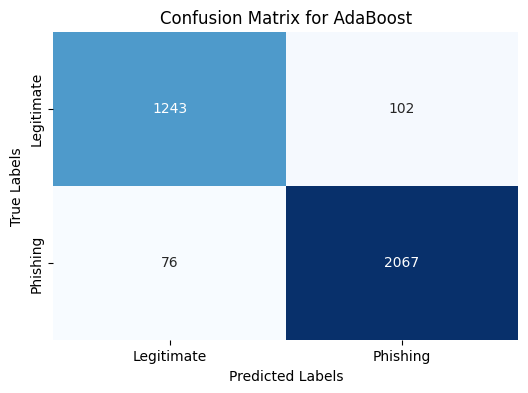

In [12]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize base estimator (decision tree with max depth = 1)
base_estimator = DecisionTreeClassifier(max_depth=1)

# Initialize AdaBoost with the SAMME algorithm
ada_boost = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, algorithm='SAMME', random_state=42)

# Fit the model
start_time = time.time()
ada_boost.fit(X_train, y_train)
end_time = time.time()
ada_train_time = end_time - start_time

# Predict on the test set
y_pred = ada_boost.predict(X_test)

# Evaluate the model
print("AdaBoost\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

# Confusion matrix
cm_ada_boost = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ada_boost, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Phishing"], yticklabels=["Legitimate", "Phishing"])
plt.title("Confusion Matrix for AdaBoost")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()





Multinomial Naive Bayes

Accuracy: 0.9825114678899083
Precision: 0.9943019943019943
Recall: 0.9771348576761549
F1 Score: 0.9856436808660861
ROC AUC: 0.9841064622953266


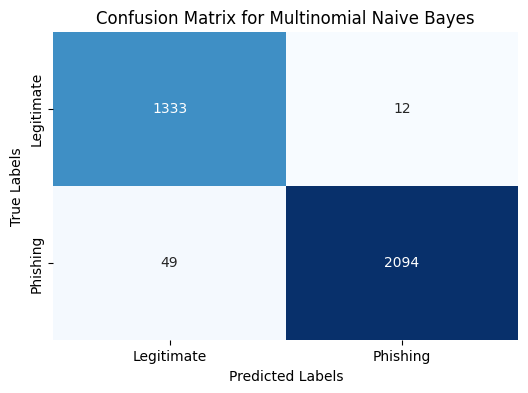

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Multinomial Naive Bayes model
mnb_model = MultinomialNB()

# Fit the model with the training data
start_time = time.time()
mnb_model.fit(X_train, y_train)
end_time = time.time()
mnb_train_time = end_time - start_time

# Make predictions on the test set
mnb_predictions = mnb_model.predict(X_test)

# Evaluate the model
print("Multinomial Naive Bayes\n")
print("Accuracy:", accuracy_score(y_test, mnb_predictions))
print("Precision:", precision_score(y_test, mnb_predictions))
print("Recall:", recall_score(y_test, mnb_predictions))
print("F1 Score:", f1_score(y_test, mnb_predictions))
print("ROC AUC:", roc_auc_score(y_test, mnb_predictions))

# Confusion matrix
cm_mnb = confusion_matrix(y_test, mnb_predictions)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_mnb, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Phishing"], yticklabels=["Legitimate", "Phishing"])
plt.title("Confusion Matrix for Multinomial Naive Bayes")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Gradient Boosting

Accuracy: 0.9784977064220184
Precision: 0.9738771769019249
Recall: 0.9916005599626692
F1 Score: 0.9826589595375722
ROC AUC: 0.9746106889032677


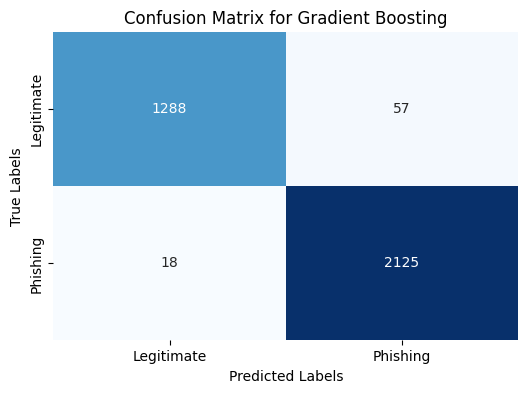

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Fit the model with the training data
start_time = time.time()
gb_model.fit(X_train, y_train)
end_time = time.time()
gb_train_time = end_time - start_time

# Make predictions on the test set
gb_predictions = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting\n")
print("Accuracy:", accuracy_score(y_test, gb_predictions))
print("Precision:", precision_score(y_test, gb_predictions))
print("Recall:", recall_score(y_test, gb_predictions))
print("F1 Score:", f1_score(y_test, gb_predictions))
print("ROC AUC:", roc_auc_score(y_test, gb_predictions))

# Confusion matrix
cm_gb = confusion_matrix(y_test, gb_predictions)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Phishing"], yticklabels=["Legitimate", "Phishing"])
plt.title("Confusion Matrix for Gradient Boosting")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()



Random Forest

Accuracy: 0.9885321100917431
Precision: 0.9902097902097902
Recall: 0.9911339244050397
F1 Score: 0.9906716417910447
ROC AUC: 0.9877602707527057


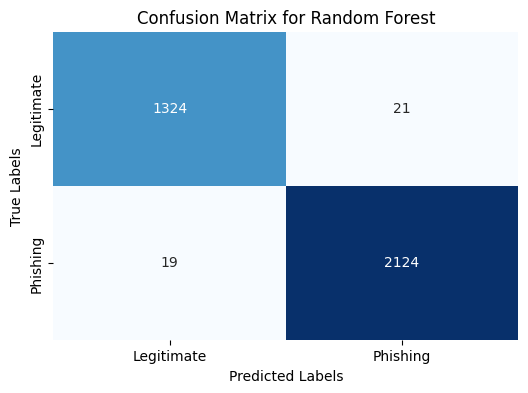

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)

# Fit the model with the training data
start_time = time.time()
rf_model.fit(X_train, y_train)
end_time = time.time()
rf_train_time = end_time - start_time

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest\n")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Precision:", precision_score(y_test, rf_predictions))
print("Recall:", recall_score(y_test, rf_predictions))
print("F1 Score:", f1_score(y_test, rf_predictions))
print("ROC AUC:", roc_auc_score(y_test, rf_predictions))

# Confusion matrix
cm_rf = confusion_matrix(y_test, rf_predictions)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Phishing"], yticklabels=["Legitimate", "Phishing"])
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()




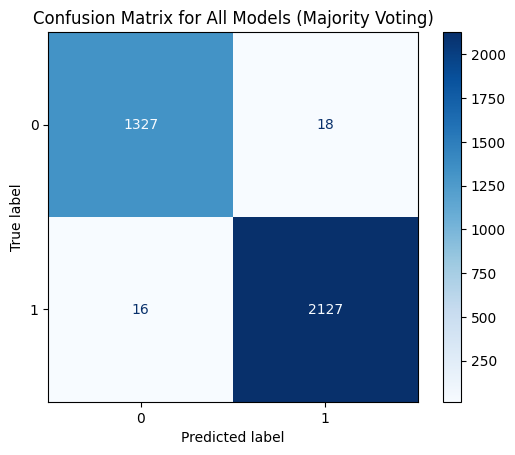

Confusion Matrix:
 [[1327   18]
 [  16 2127]]


In [16]:
import numpy as np
from scipy.stats import mode
from sklearn.metrics import ConfusionMatrixDisplay



predictions = {
     'KNN': knn_predictions,
     'Random Forest': rf_predictions,
     'Logistic Regression': lr_predictions,
     'Gradient Boosting ': gb_predictions,
     'Multinomial Naive Bayes':mnb_predictions,
     'ada_boost':y_pred
}
# Stack the predictions
all_predictions = np.array(list(predictions.values()))

# Perform majority voting
final_predictions = mode(all_predictions, axis=0)[0].flatten()

# Create confusion matrix for the aggregated predictions
cm = confusion_matrix(y_test, final_predictions)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for All Models (Majority Voting)")
plt.show()

# Print the confusion matrix values for reference
print("Confusion Matrix:\n", cm)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


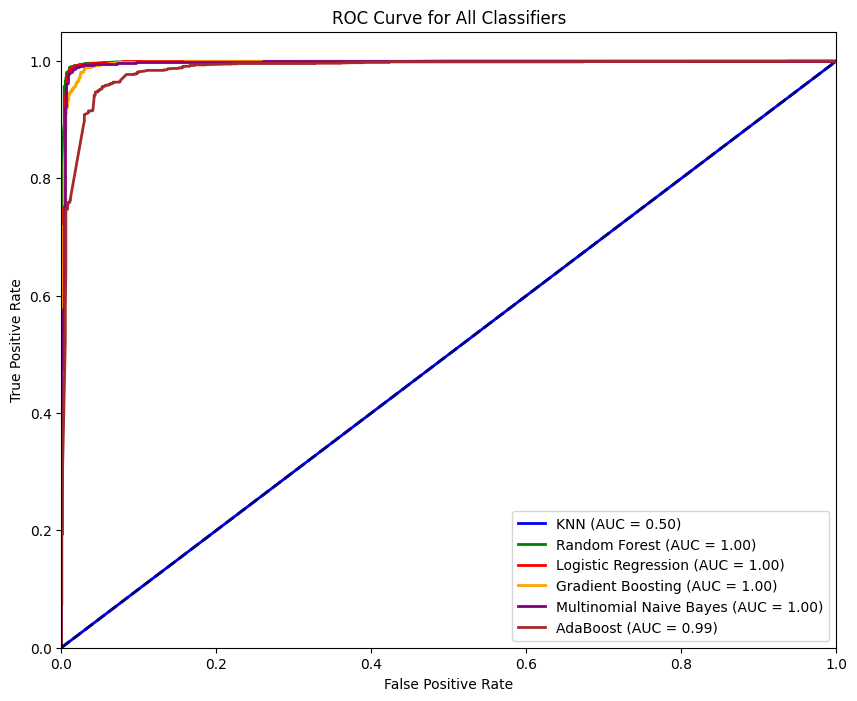

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define your classifiers
clf_dict = {
    'KNN': knn_model,
    'Random Forest': rf_model,
    'Logistic Regression': lr_model,
    'Gradient Boosting': gb_model,
    'Multinomial Naive Bayes': mnb_model,
    'AdaBoost': ada_boost
}

# Assuming `y_test` contains the true labels

# Colors for the ROC curves
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown']

# Start a new figure
plt.figure(figsize=(10, 8))

# Loop over each classifier and plot the ROC curve
for idx, (name, clf) in enumerate(clf_dict.items()):
    # Get probabilities for the positive class (class 1)
    if hasattr(clf, 'predict_proba'):  # Check if the classifier supports predict_proba()
        preds = clf.predict_proba(X_test)[:, 1]  # Probabilities for class 1
    else:
        # For classifiers like SVM that don't have `predict_proba`, use `decision_function()`
        preds = clf.decision_function(X_test)

    # Compute ROC curve and AUC score
    fpr, tpr, _ = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, color=colors[idx], lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot diagonal line representing random guess
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Classifiers')
plt.legend(loc='lower right')

# Show the plot
plt.show()




In [18]:
#BERT


In [19]:
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import DataLoader, TensorDataset
import torch
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import time
import matplotlib.pyplot as pl

In [20]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the combined text
inputs = tokenizer(list(cleaned_data['combined_text']),
                   padding=True,
                   truncation=True,
                   max_length=512,
                   return_tensors="pt")

# Convert labels to tensors
labels = torch.tensor(cleaned_data['label'].values)

# Create a TensorDataset
dataset = TensorDataset(inputs['input_ids'], inputs['attention_mask'], labels)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [21]:
from torch.utils.data import random_split

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])


In [22]:
from transformers import BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader
import torch

# Load BERT model for classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(cleaned_data['label'].unique()))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Prepare DataLoader
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8)

# Set optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)




Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [23]:
# Training loop
start_time = time.time()
# Training loop
epochs = 4
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        input_ids, attention_mask, labels = [x.to(device) for x in batch]
        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader)}")
end_time = time.time()
bert_train_time = end_time - start_time
print(f"Training time: {bert_train_time} seconds")





Epoch 1/4, Loss: 0.08016890321149055
Epoch 2/4, Loss: 0.020948034622318645
Epoch 3/4, Loss: 0.013517037026587719
Epoch 4/4, Loss: 0.008420786165394904
Training time: 5100.38627743721 seconds


Accuracy: 0.9951261467889908
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1330
           1       0.99      1.00      1.00      2158

    accuracy                           1.00      3488
   macro avg       1.00      0.99      0.99      3488
weighted avg       1.00      1.00      1.00      3488



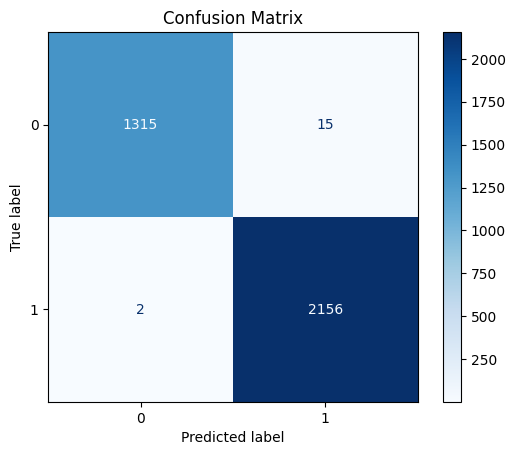

In [24]:
# Evaluation
model.eval()
predictions, true_labels = [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = [x.to(device) for x in batch]
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions.append(torch.argmax(logits, axis=1).cpu().numpy())
        true_labels.append(labels.cpu().numpy())

predictions = [item for sublist in predictions for item in sublist]
true_labels = [item for sublist in true_labels for item in sublist]

# Calculate accuracy and classification report
print("Accuracy:", accuracy_score(true_labels, predictions))
print(classification_report(true_labels, predictions))

# Confusion Matrix
cm = confusion_matrix(true_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

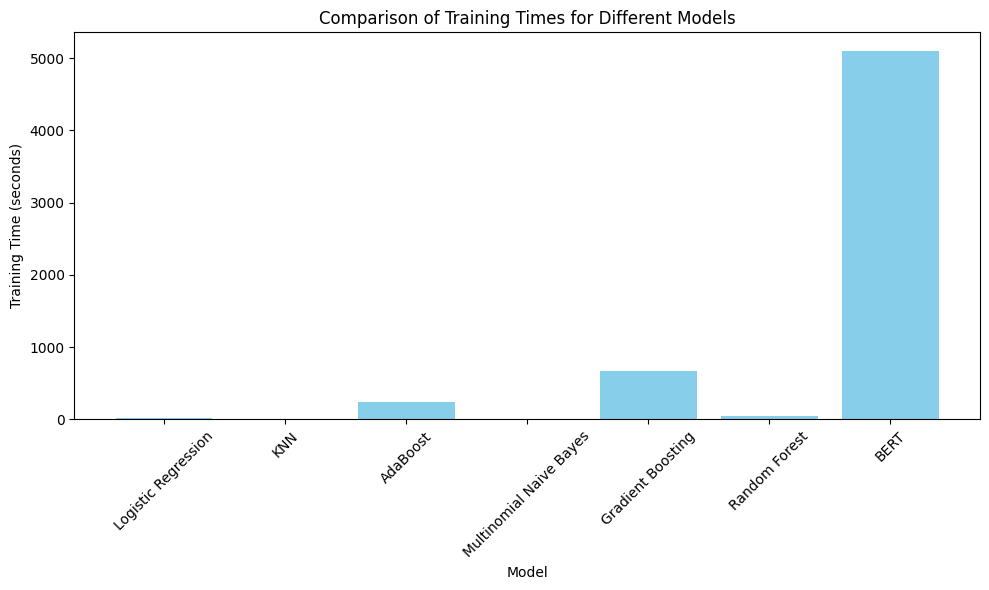

In [25]:
# Dictionary to store training times for each model
train_times = {
    'Logistic Regression': lr_train_time,
    'KNN': knn_train_time,
    'AdaBoost': ada_train_time,
    'Multinomial Naive Bayes': mnb_train_time,
    'Gradient Boosting': gb_train_time,
    'Random Forest': rf_train_time,
    'BERT': bert_train_time,
}

# Plotting the training times
plt.figure(figsize=(10, 6))
plt.bar(train_times.keys(), train_times.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Training Time (seconds)')
plt.title('Comparison of Training Times for Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()